# Tempest Extreme experiment with NextGEMS data
Data have been already preprocessed to 1x1 grid on Levante

We start by reading and putting together into a single netcdf file

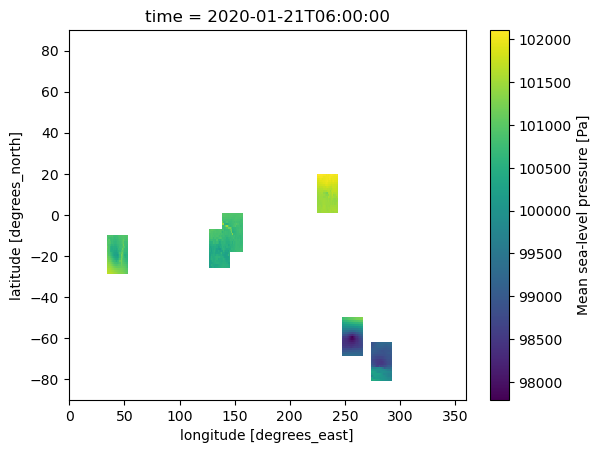

In [1]:
import xarray as xr
import os
import subprocess
from time import time
from glob import glob


from functionsTCs import *

# path to input directory
indir='/home/b/b382216/scratch/regrid'
tmpdir='/home/b/b382216/scratch/tmpdir'
fulldir='/home/b/b382216/scratch/fullres'

time = '000600'
infile = os.path.join(indir, f'regrid+{time}_*.nc')
outfile = os.path.join(tmpdir, time + '.nc')
txtfile = os.path.join(tmpdir, 'output_' + time + '.txt')
mslfile=os.path.join(fulldir, f'ICMGGhqys+{time}_msl.nc')
storefile = os.path.join(tmpdir, 'TC_' + time + '.nc')

# read and save the netcdf file to mimic the time lost by the FDB query
tempest_dictionary = readwrite_from_lowres(infile, outfile)
tempest_command = run_detect_nodes(tempest_dictionary, outfile, txtfile)
tempest_nodes = read_lonlat_nodes(txtfile) 

xfield = xr.open_mfdataset(outfile)['MSL']

# set the dimension in degrees of lon/lat of the box around the TCs centre
boxdim=10
gfield = xfield * 0
for k in range(0, len(tempest_nodes['lon'])) :
    box = lonlatbox(tempest_nodes['lon'][k], tempest_nodes['lat'][k], boxdim)
    gfield = gfield + xr.where((xfield.lon > box[0]) & (xfield.lon < box[1]) & (xfield.lat > box[2]) & (xfield.lat < box[3]), True, False)

xfield = xfield.where(gfield>0)

xfield.plot()

In [1]:
import xarray as xr
import os
import subprocess
from time import time
from glob import glob

from functionsTCs import *

# path to input directory
indir='/home/b/b382216/scratch/regrid'
tmpdir='/home/b/b382216/scratch/tmpdir'
fulldir='/home/b/b382216/scratch/fullres'

boxdim=10

# variables to be stored
varlist = ['psl', 'uas', 'vas']

# dicitonary with the original filenames
original_dictionary = {'psl': 'msl', 'uas': '10u', 'vas': '10v' }

#t1=120*4*30*8
#t2=((120*4*30*8)+(120*4*14))
t1=0
t2=166560

# loop on timerecords
for t in range(t1, t2, 120) : 

    tttt = str(t).zfill(6)
    print(tttt)
    # path definition
    original_file = os.path.join(indir, f'regrid+{tttt}_*.nc')
    netcdf_file = os.path.join(tmpdir, tttt + '.nc')
    txt_file = os.path.join(tmpdir, 'tempest_output_' + tttt + '.txt')

    # read and save the netcdf file to mimic the time lost by the FDB query
    tempest_dictionary = readwrite_from_lowres(original_file, netcdf_file)

     # run tempest extremes
    tempest_command = run_detect_nodes(tempest_dictionary, netcdf_file, txt_file)
    tempest_nodes = read_lonlat_nodes(txt_file)
    id = tempest_nodes['date']
    print(id)
    
    for var in varlist: 
        print(var)

        varname = tempest_dictionary[var]
        varfile = original_dictionary[var]
    # take the LOW res files to find the bug in the reordered tracks later


        fullres_file=os.path.join(indir, f'regrid+{tttt}_{varfile}.nc')
        #print(fullres_field)
        #prec_fullres_file=os.path.join(fulldir, f'ICMGGhqys+{tttt}_v10.nc')
   
        # get the full res field and store the required values around the Nodes
        fullres_field = xr.open_mfdataset(fullres_file)[varname]
        xfield = store_fullres_field(0, fullres_field, tempest_nodes, boxdim)


        store_file = os.path.join(tmpdir, f'TC_{varname}_{id}.nc')
        write_fullres_field(xfield, store_file)
  
    clean_files([netcdf_file])

    ##reinit xfield
    #xfield = 0


000000
2020012000
psl
uas
vas
000120
2020012006
psl
uas
vas
000240
2020012012
psl
uas
vas
000360
2020012018
psl
uas
vas
000480
2020012100
psl
uas
vas
000600
2020012106
psl
uas
vas
000720
2020012112
psl
uas
vas
000840
2020012118
psl
uas
vas
000960
2020012200
psl
uas
vas
001080
2020012206
psl
uas
vas
001200
2020012212
psl
uas
vas
001320
2020012218
psl
uas
vas
001440
2020012300
psl
uas
vas
001560
2020012306
psl
uas
vas
001680
2020012312
psl
uas
vas
001800
2020012318
psl
uas
vas
001920
2020012400
psl
uas
vas
002040
2020012406
psl
uas
vas
002160
2020012412
psl
uas
vas
002280
2020012418
psl
uas
vas
002400
2020012500
psl
uas
vas
002520
2020012506
psl
uas
vas
002640
2020012512
psl
uas
vas
002760
2020012518
psl
uas
vas
002880
2020012600
psl
uas
vas
003000
2020012606
psl
uas
vas
003120
2020012612
psl
uas
vas
003240
2020012618
psl
uas
vas
003360
2020012700
psl
uas
vas
003480
2020012706
psl
uas
vas
003600
2020012712
psl
uas
vas
003720
2020012718
psl
uas
vas
003840
2020012800
psl
uas
vas
003960
202

In [2]:

track_file = os.path.join(tmpdir, 'tempest_track.txt')
filenames = sorted(glob(os.path.join(tmpdir,'tempest_output_*')))

# MAXGAP set to 24h to see if there are problem in the concatenation of outputs from detect nodes
stitch_string = run_stitch_nodes(filenames, track_file, maxgap = '6h')
# output track. txt OK!

Arguments:
  --in <string> ["full_nodes.txt"] 
  --in_list <string> [""] 
  --in_connect <string> [""] 
  --out <string> ["/home/b/b382216/scratch/tmpdir/tempest_track.txt"] 
  --in_fmt <string> ["lon,lat,slp,wind"] 
  --range <double> [8.000000] (degrees)
  --mintime <string> ["54h"] 
  --time_begin <string> [""] 
  --time_end <string> [""] 
  --min_endpoint_dist <double> [0.000000] (degrees)
  --min_path_dist <double> [0.000000] (degrees)
  --maxgap <string> ["6h"] 
  --threshold <string> ["wind,>=,10.0,10;lat,<=,50.0,10;lat,>=,-50.0,10"] [col,op,value,count;...]
  --caltype <string> ["standard"] (none|standard|noleap|360_day)
  --allow_repeated_times <bool> [false] 
  --out_file_format <string> ["gfdl"] (gfdl|csv|csvnohead)
------------------------------------------------------------
Parsing thresholds
..wind greater than or equal to 10.000000 at least 10 time(s)
..lat less than or equal to 50.000000 at least 10 time(s)
..lat greater than or equal to -50.000000 at least 10 time(s)
.

Get the lon/lat from the Stitch Nodes output .txt file

In [3]:
 # open the output file and extract the required lon/lat
track_file = os.path.join(tmpdir, 'tempest_track.txt')
# reordered_tracks is a dict containing the concatenated (in time) tracks
# at eatch time step are associated all lons/lats
reordered_tracks = reorder_tracks(track_file)

# initialise full_res fields at 0 before the loop

for var in varlist : 
    varname = tempest_dictionary[var]
    xfield = 0
    for id in reordered_tracks.keys():

        print(id)
        fullres_file = os.path.join(tmpdir, f'TC_{varname}_{id}.nc')
        fullres_field = xr.open_mfdataset(fullres_file)[varname]

        # get the full res field and store the required values around the Nodes
        xfield = store_fullres_field(xfield, fullres_field, reordered_tracks[id], boxdim)
       

    print('Storing output')

    # store the file
    store_file = os.path.join(tmpdir, f'tempest_tracks_{varname}.nc')
    write_fullres_field(xfield, store_file)


2020020312
2020020318
2020020400
2020020406
2020020412
2020020418
2020020500
2020020506
2020020512
2020020518
2020020600
2020020606
2020020612
2020020618
2020020700
2020020706
2020020712
2020020718
2020020800
2020020806
2020020812
2020020818
2020020900
2020020906
2020020912
2020020918
2020021000
2020021006
2020021012
2020021018
2020021100
2020021106
2020021112
2020021118
2020021200
2020021206
2020021212
2020021218
2020021300
2020021306
2020021312
2020021318
2020021400
2020021406
2020021918
2020022000
2020022006
2020022012
2020022018
2020022100
2020022106
2020022112
2020022118
2020022200
2020022206
2020022212
2020022218
2020022300
2020022306
2020022312
2020022318
2020022400
2020022406
2020022412
2020022418
2020022500
2020022506
2020022512
2020022518
2020022600
2020022606
2020022612
2020022618
2020022700
2020022706
2020022712
2020022718
2020022800
2020022806
2020022812
2020022818
2020022900
2020022906
2020022912
2020022918
2020030100
2020030106
2020030112
2020030118
2020030200
2020030206

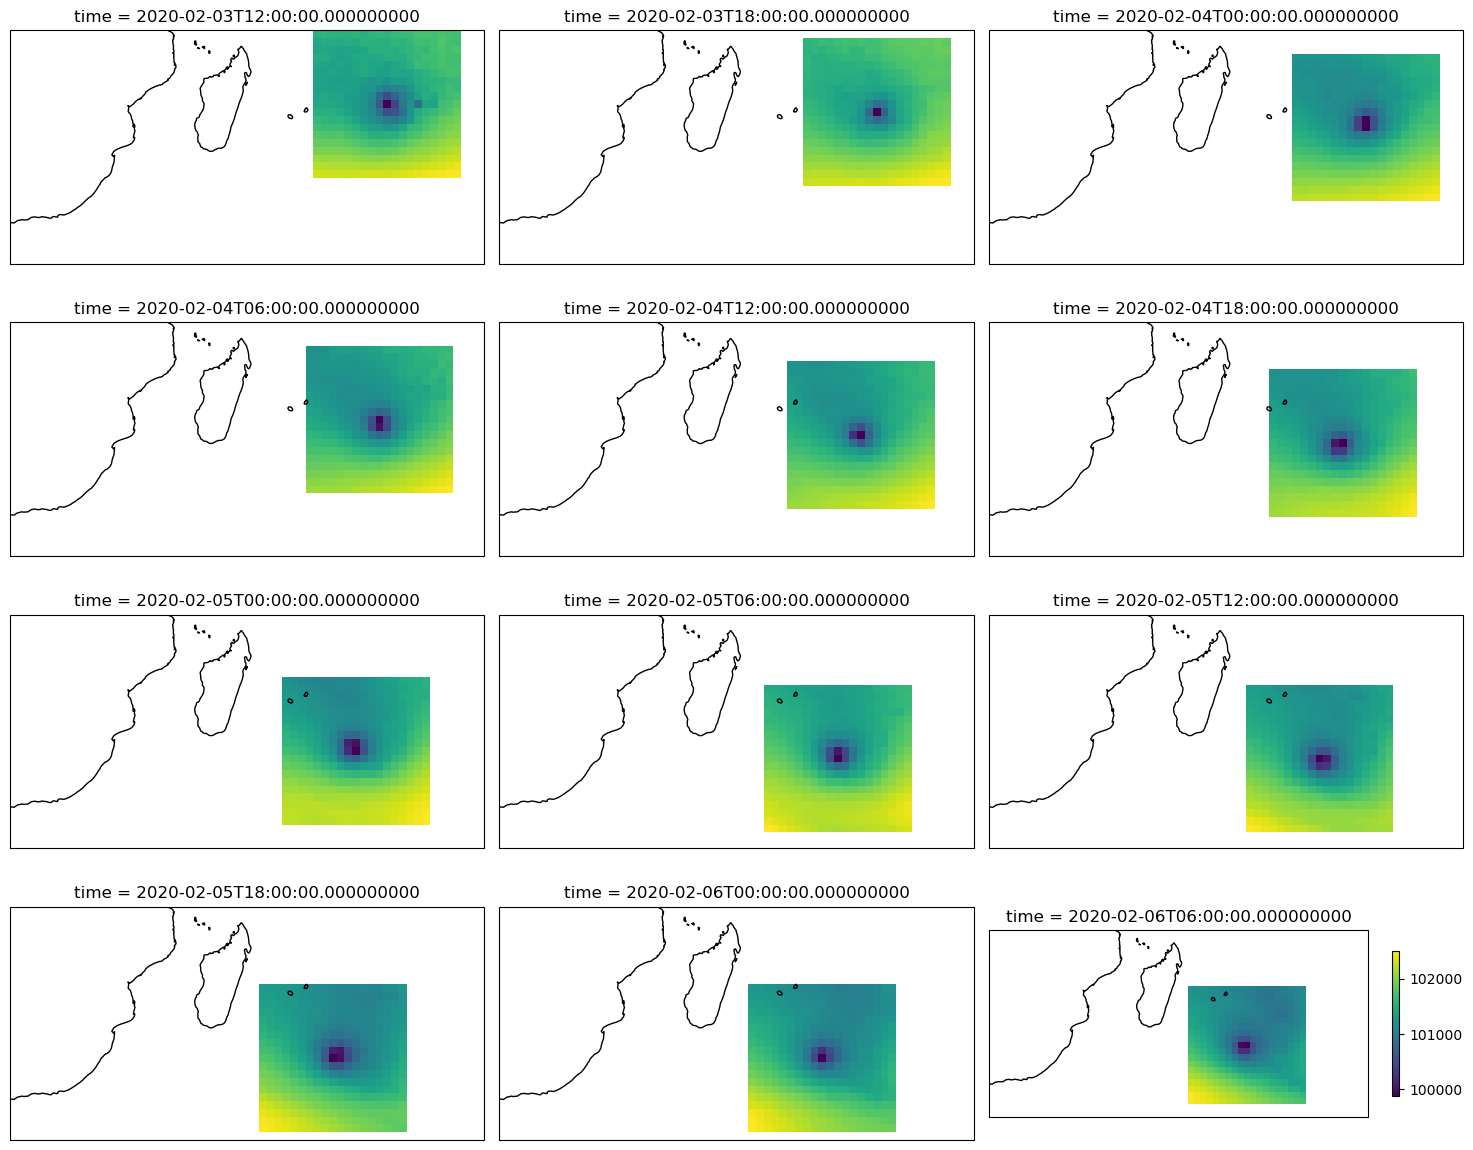

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

final_file = os.path.join(tmpdir, 'tempest_tracks_MSL.nc')
final = xr.open_dataset(final_file)['MSL']

# fig = plt.figure(figsize=(10, 5))
# ax = plt.axes(projection=ccrs.PlateCarree())
# final.sel(time=pd.Timestamp('2020-11-22T06')).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())
# ax.coastlines()
# plt.show()


# create 10 subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

# loop over subplots and plot different time slices in each one
for i, ax in enumerate(axs):
    final_sel = final.sel(lon=slice(20, 80), lat=slice(-40, -10))
    final_sel.isel(time=i+30).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
    ax.coastlines()
    ax.set_title(f'time = {final.time[i].values}')

# add a colorbar
plt.colorbar(ax.collections[0], ax=ax, shrink=0.5)

plt.tight_layout()
plt.show()

In [25]:
final

<xarray.DataArray 'U10M' (time: 465, lat: 180, lon: 360)>
[30132000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-02-03T12:00:00 ... 2020-12-16T18:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:  10 metre U wind component
    units:      m s**-1
    code:       165
    table:      128